<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/batch_vs_stochastic_gd_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [ ]:
import time

url = '/kaggle/input/social-network-ads/Social_Network_Ads.csv'
df = pd.read_csv(url)

In [ ]:
df = df[['Age', 'EstimatedSalary','Purchased']]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(400, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu', input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])

start = time.time()
#history = model.fit(X_train,y_train, epochs=10, batch_size=320)
# if batch_size=320 then this same algorithm becomes batch gradient descent
# if batch_size=1 then this same algorithm becomes stochastic gradient descent
#history = model.fit(X_train,y_train, epochs=10, batch_size=1)
###########################################################################################################################
#history = model.fit(X_scaled,Y, epochs=10, batch_size=400, validation_split=0.2)#batch gradient descent
# here we are not taking training data instead of that we are taking whole data 20% of whole data is used for validation
history = model.fit(X_scaled,Y, epochs=200, batch_size=1, validation_split=0.2)#stochastic gradient descent
print(time.time()-start)

Epoch 1/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2741 - accuracy: 0.9094 - val_loss: 0.1626 - val_accuracy: 0.9375
Epoch 2/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9156 - val_loss: 0.1576 - val_accuracy: 0.9375
Epoch 3/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2790 - accuracy: 0.9187 - val_loss: 0.1598 - val_accuracy: 0.9500
Epoch 4/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.9156 - val_loss: 0.1602 - val_accuracy: 0.9375
Epoch 5/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.9187 - val_loss: 0.1652 - val_accuracy: 0.9375
Epoch 6/200
320/320 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.9125 - val_loss: 0.1754 - val_accuracy: 0.9375
Epoch 7/200
320/320 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9125 - val_loss: 0.1705 - val_accuracy: 0.9375

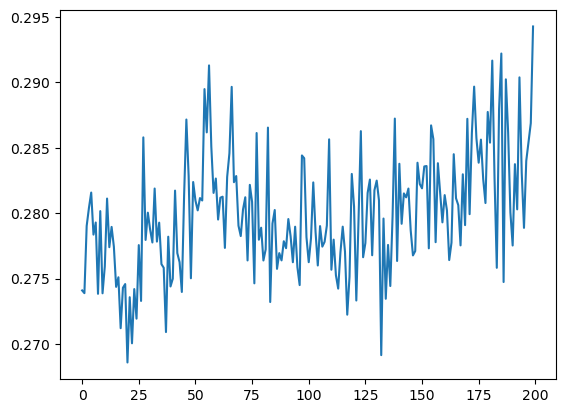

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])

start = time.time()
#history = model.fit(X_train,y_train, epochs=10, batch_size=320)
# if batch_size=320 then this same algorithm becomes batch gradient descent
# if batch_size=1 then this same algorithm becomes stochastic gradient descent
#history = model.fit(X_train,y_train, epochs=10, batch_size=1)
###########################################################################################################################
history = model.fit(X_scaled,Y, epochs=10, batch_size=1500, validation_split=0.2)#batch gradient descent
# here we are not taking training data instead of that we are taking whole data 20% of whole data is used for validation
#history = model.fit(X_scaled,Y, epochs=200, batch_size=1, validation_split=0.2)#stochastic gradient descent
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 1s 766ms/step - loss: 0.2081 - accuracy: 0.9156 - val_loss: 0.2636 - val_accuracy: 0.9125
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.2088 - accuracy: 0.9187 - val_loss: 0.2781 - val_accuracy: 0.9000
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.2080 - accuracy: 0.9156 - val_loss: 0.2793 - val_accuracy: 0.8875
Epoch 4/10
1/1 [==============================] - 0s 33ms/step - loss: 0.2079 - accuracy: 0.9156 - val_loss: 0.2737 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.2078 - accuracy: 0.9156 - val_loss: 0.2814 - val_accuracy: 0.8875
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.2078 - accuracy: 0.9125 - val_loss: 0.2711 - val_accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2077 - accuracy: 0.9156 - val_loss: 0.2791 - val_accuracy: 0.8875
Epoch 8/10
1/1 [==========

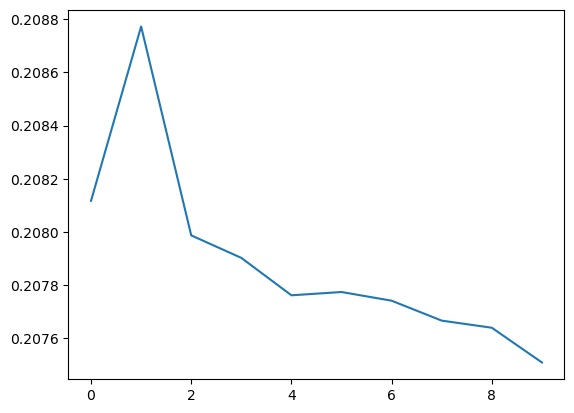

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])